In [1]:
%matplotlib notebook
!git pull
import os;os.environ['LAMBDA_PARQUET_TICK_DB']=rf'X:\lambda_data'


Already up to date.


In [2]:
from notebooks.lambda_imports import *
plot_with_dark_style()

PROJECT_PATH=E:\javif\Coding\Python\market_making_fw\python_lambda
BACKTEST_OUTPUT_PATH(LAMBDA_OUTPUT_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\output
BACKTEST_JAR_PATH(LAMBDA_JAR_PATH)=E:\javif\Coding\Python\market_making_fw\java\executables\Backtest\target\Backtest.jar
log_path(LAMBDA_LOGS_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\logs
PARQUET_PATH_DB(LAMBDA_PARQUET_TICK_DB)=X:\lambda_data


In [3]:
today=datetime.datetime.today()
yesterday = today - datetime.timedelta(days=1)
today

datetime.datetime(2021, 1, 4, 11, 11, 44, 983722)

In [8]:
tick = TickDB()
instrument_pk = 'btcusdt_binance'

In [9]:
instruments = tick.get_all_instrument()
dates = tick.get_all_dates(type_str='depth',instrument_pk=instrument_pk)

AttributeError: 'TickDB' object has no attribute 'get_all_instrument'

In [10]:
# trades_df_all = tick.get_all_trades(instrument_pk=LambdaInstrument.btcusdt_binance)
t0 = time.time()
trades_df = tick.get_trades(instrument_pk=instrument_pk)
depth_df = tick.get_depth(instrument_pk=instrument_pk)
t1 = time.time()

f"Got {len(trades_df)} rows in {t1-t0} seconds"
trades_df.tail()

downloading btcusdt_binance trade from 20201228 to 20210104
downloading btcusdt_binance depth from 20201228 to 20210104


,price,quantity
date,,
2021-01-03 22:59:52.838,33114.99,0.000310
2021-01-03 22:59:52.870,33113.05,0.042918
2021-01-03 22:59:52.886,33114.99,0.140578
2021-01-03 22:59:52.975,33113.05,0.004655
2021-01-03 22:59:53.071,33113.06,0.000720


In [11]:
trades_df.tail()

,price,quantity
date,,
2021-01-03 22:59:52.838,33114.99,0.000310
2021-01-03 22:59:52.870,33113.05,0.042918
2021-01-03 22:59:52.886,33114.99,0.140578
2021-01-03 22:59:52.975,33113.05,0.004655
2021-01-03 22:59:53.071,33113.06,0.000720


In [12]:
depth_df.head()

,askPrice0,askPrice1,askPrice2,askPrice3,askPrice4,askQuantity0,askQuantity1,askQuantity2,askQuantity3,askQuantity4,bidPrice0,bidPrice1,bidPrice2,bidPrice3,bidPrice4,bidQuantity0,bidQuantity1,bidQuantity2,bidQuantity3,bidQuantity4
date,,,,,,,,,,,,,,,,,,,,
2020-12-27 22:59:50.588,26509.42,26514.18,26514.36,26516.08,26519.19,0.021916,0.106855,0.074000,0.199117,0.114279,26509.41,26509.15,26506.80,26506.59,26505.89,0.447332,0.200000,0.115000,0.226583,0.045984
2020-12-27 22:59:51.588,26510.00,26512.21,26516.08,26516.50,26520.09,0.110875,0.040610,0.204086,0.188000,0.114279,26509.99,26509.87,26509.75,26509.51,26509.41,0.250000,0.003000,0.003000,0.085179,0.200000
2020-12-27 22:59:52.588,26510.32,26511.57,26514.68,26518.03,26518.72,0.887053,0.093484,0.075000,0.208411,0.220000,26510.31,26510.15,26509.99,26509.52,26506.79,0.250000,0.003000,0.095566,0.086760,0.012369
2020-12-27 22:59:53.588,26510.32,26513.82,26516.82,26533.50,27835.84,0.765276,0.093484,0.212177,0.137618,0.001132,26510.31,26509.99,26502.95,26499.39,26495.01,0.178597,0.000566,0.106516,0.212177,0.295192
2020-12-27 22:59:54.588,26510.32,26514.95,26515.00,26516.82,26522.32,0.665924,0.075000,0.139359,0.215456,0.078718,26510.31,26510.00,26508.93,26499.56,26490.52,0.083529,0.095000,0.018857,0.215456,0.039359


In [13]:
candles = tick.get_candles_time(instrument_pk=instrument_pk)
candles.head()



downloading btcusdt_binance trade from 20201228 to 20210104


price                                quantity  \
                         open      high       low     close      open   
date                                                                    
2020-12-27 22:59:00  26510.00  26521.14  26509.99  26521.14  0.003573   
2020-12-27 23:00:00  26522.61  26526.86  26466.73  26470.28  0.024577   
2020-12-27 23:01:00  26470.28  26505.94  26470.28  26501.22  0.011898   
2020-12-27 23:02:00  26501.23  26503.11  26392.30  26392.86  0.005743   
2020-12-27 23:03:00  26392.85  26466.59  26392.31  26443.83  0.000422   

                                                   
                         high       low     close  
date                                               
2020-12-27 22:59:00  0.506753  0.000379  0.060831  
2020-12-27 23:00:00  1.002400  0.000006  0.003885  
2020-12-27 23:01:00  0.644512  0.000012  0.001990  
2020-12-27 23:02:00  1.000000  0.000010  0.007053  
2020-12-27 23:03:00  1.252732  0.000009  0.015170

<IPython.core.display.Javascript object>


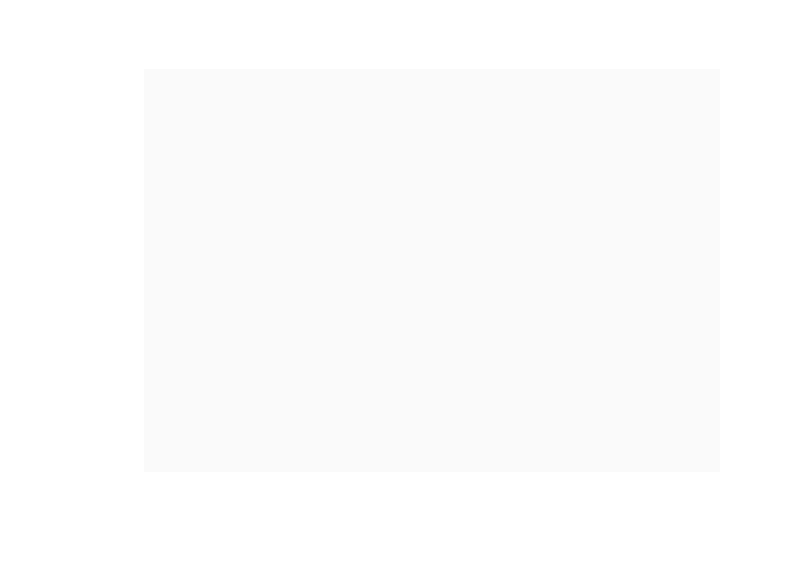

In [14]:
import mplfinance as mpf
mpf.plot(candles.price, style="yahoo", mav=(20, 100))

## Last day

In [15]:
t0 = time.time()
trades_yesterday_df = tick.get_trades(instrument_pk=instrument_pk,start_date=yesterday)
depth_yesterday_df = tick.get_depth(instrument_pk=instrument_pk,start_date=yesterday)
candles_yesterday_df = tick.get_candles_time(instrument_pk=instrument_pk,start_date=yesterday)
t1 = time.time()

f"Got {len(trades_df)} rows in {t1-t0} seconds"
trades_df.tail()

downloading btcusdt_binance trade from 20210103 to 20210104
downloading btcusdt_binance depth from 20210103 to 20210104
downloading btcusdt_binance trade from 20210103 to 20210104


,price,quantity
date,,
2021-01-03 22:59:52.838,33114.99,0.000310
2021-01-03 22:59:52.870,33113.05,0.042918
2021-01-03 22:59:52.886,33114.99,0.140578
2021-01-03 22:59:52.975,33113.05,0.004655
2021-01-03 22:59:53.071,33113.06,0.000720


In [16]:
trades_yesterday_df['price'].dropna().iloc[:5].plot()

ValueError: view limit minimum -36890.69780701439 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<IPython.core.display.Javascript object>


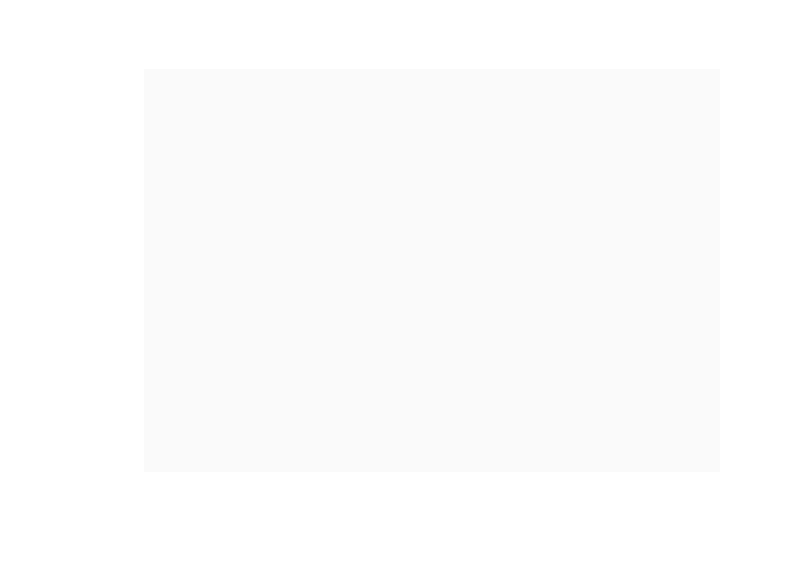

In [17]:
mpf.plot(candles_yesterday_df.price, style="yahoo", mav=(20, 100))


In [18]:
candles_yesterday_df.index

DatetimeIndex(['2021-01-02 22:59:00', '2021-01-02 23:00:00',
               '2021-01-02 23:01:00', '2021-01-02 23:02:00',
               '2021-01-02 23:03:00', '2021-01-02 23:04:00',
               '2021-01-02 23:05:00', '2021-01-02 23:06:00',
               '2021-01-02 23:07:00', '2021-01-02 23:08:00',
               ...
               '2021-01-03 22:50:00', '2021-01-03 22:51:00',
               '2021-01-03 22:52:00', '2021-01-03 22:53:00',
               '2021-01-03 22:54:00', '2021-01-03 22:55:00',
               '2021-01-03 22:56:00', '2021-01-03 22:57:00',
               '2021-01-03 22:58:00', '2021-01-03 22:59:00'],
              dtype='datetime64[ns]', name='date', length=1441, freq='T')

In [23]:
trades_yesterday_df['quantity'].plot()

ValueError: view limit minimum -36890.74718399618 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units